In [8]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load all results

In [18]:
LSTM_full_results = []
for i in range(5):
    with open(f"results/LSTM/Performance_metrices_LSTM_bin_{i+1}.pkl", "rb") as f:
        data = pickle.load(f)
        LSTM_full_results.append(data)

CNN_full_results = []
for i in range(5):
    with open(f"results/CNN/Performance_metrices_CNN_bin_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        CNN_full_results.append(data)

XGBoost_full_results = []
for i in range(5):
    with open(f"results/XGBoost/Performance_metrices_XGBoost_bin_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        XGBoost_full_results.append(data)

In [19]:
LSTM_mape = []
for i in range(5):
  LSTM_mape_bin =[]
  for j in range(15):
    LSTM_mape_bin.append(LSTM_full_results[i][j]['test_mape'])
  LSTM_mape.append(LSTM_mape_bin)

CNN_mape = []
for i in range(5):
  CNN_mape_bin =[]
  for j in range(15):
    CNN_mape_bin.append(CNN_full_results[i][j]['test_mape'])
  CNN_mape.append(CNN_mape_bin)

XGBoost_mape = []
for i in range(5):
  XGBoost_mape_bin =[]
  for j in range(15):
    XGBoost_mape_bin.append(XGBoost_full_results[i][j]['test_mape'])
  XGBoost_mape.append(XGBoost_mape_bin)

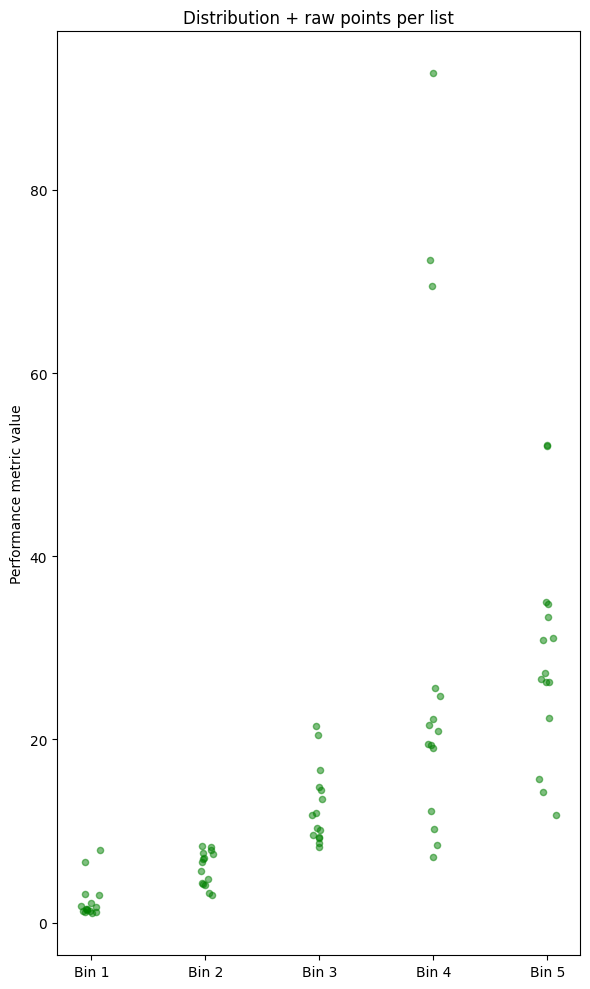

In [ ]:
fig, ax = plt.subplots(figsize=(6,10))


# scatter the raw points on top (with jitter)
for idx, group in enumerate(LSTM_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='green', s=20)

ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Bin {i}' for i in range(1,6)])
ax.set_xlabel('')
ax.set_ylabel('Performance metric value')
ax.set_title('Raw LSTM performance per stock/ETF')

plt.tight_layout()
plt.show()

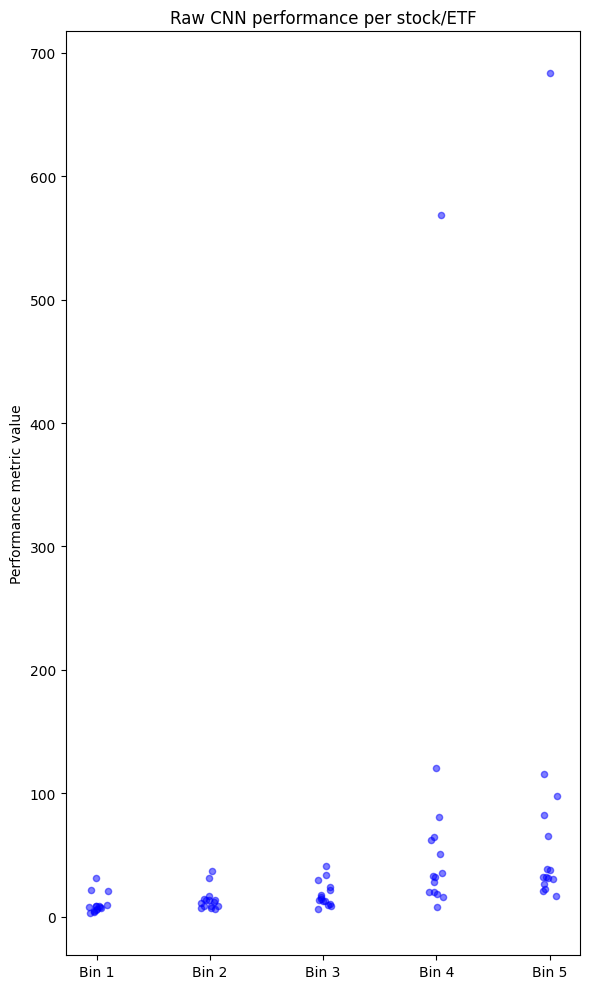

In [46]:
fig, ax = plt.subplots(figsize=(6,10))


# scatter the raw points on top (with jitter)
for idx, group in enumerate(CNN_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='blue', s=20)

ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Bin {i}' for i in range(1,6)])
ax.set_xlabel('')
ax.set_ylabel('Performance metric value')
ax.set_title('Raw CNN performance per stock/ETF')

plt.tight_layout()
plt.show()

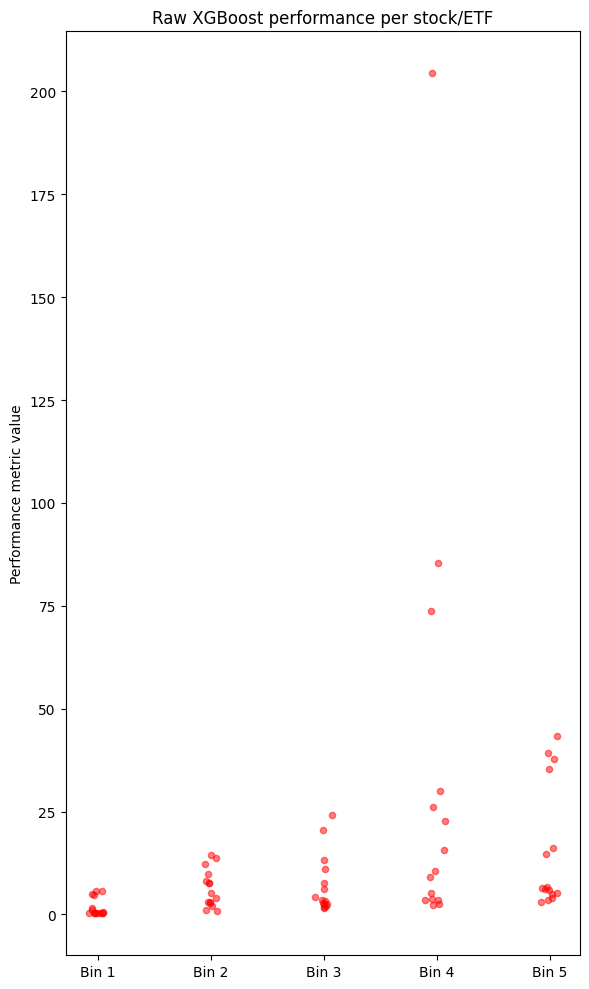

In [47]:
fig, ax = plt.subplots(figsize=(6,10))


# scatter the raw points on top (with jitter)
for idx, group in enumerate(XGBoost_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='red', s=20)

ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Bin {i}' for i in range(1,6)])
ax.set_xlabel('')
ax.set_ylabel('Performance metric value')
ax.set_title('Raw XGBoost performance per stock/ETF')

plt.tight_layout()
plt.show()

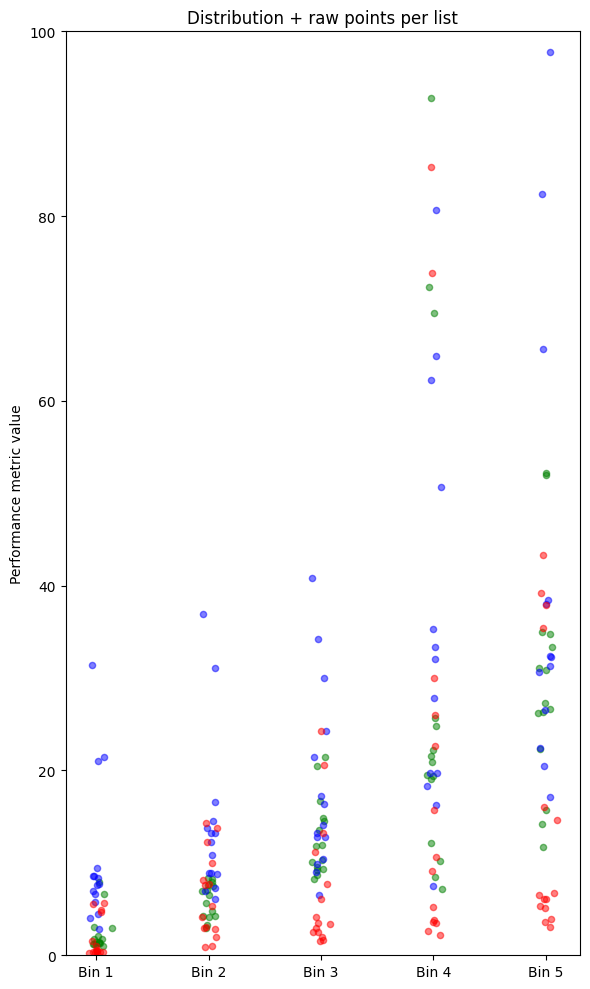

In [45]:
fig, ax = plt.subplots(figsize=(6,10))


# scatter the raw points on top (with jitter)
for idx, group in enumerate(LSTM_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='green', s=20, label='LSTM_performance')

# scatter the raw points on top (with jitter)
for idx, group in enumerate(CNN_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='blue', s=20, label='CNN_performance')

# scatter the raw points on top (with jitter)
for idx, group in enumerate(XGBoost_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='red', s=20, label='XGBoost_performance')

ax.set_ylim(0,100)
ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Bin {i}' for i in range(1,6)])
ax.set_xlabel('')
ax.set_ylabel('Performance metric value')
ax.set_title('Distribution + raw points per list')

plt.tight_layout()
plt.show()


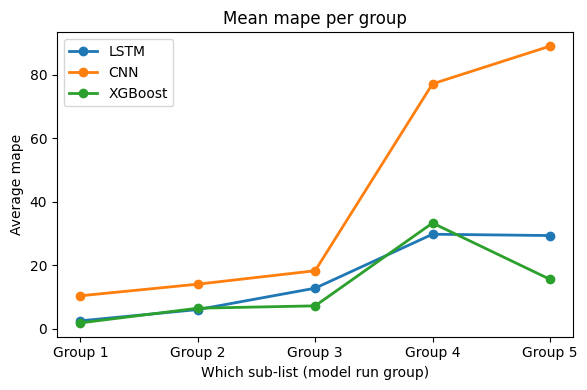

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Compute the mean of each group
means_LSTM = [np.mean(group) for group in LSTM_mape]
means_CNN = [np.mean(group) for group in CNN_mape]
means_XGBoost = [np.mean(group) for group in XGBoost_mape]

# 2. Plot
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(range(1, 6), means_LSTM, marker='o', linestyle='-', linewidth=2, label='LSTM')
ax.plot(range(1, 6), means_CNN, marker='o', linestyle='-', linewidth=2, label='CNN')
ax.plot(range(1, 6), means_XGBoost, marker='o', linestyle='-', linewidth=2, label='XGBoost')

# 3. Labels & limits
ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Group {i}' for i in range(1, 6)])
ax.set_xlabel('Which sub-list (model run group)')
ax.set_ylabel(f'Average mape')
ax.set_title(f'Mean mape per group')
ax.legend()

plt.tight_layout()
plt.show()
